<a href="https://colab.research.google.com/github/mamrai/RFNSA/blob/main/RFNSA_V_1_4_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



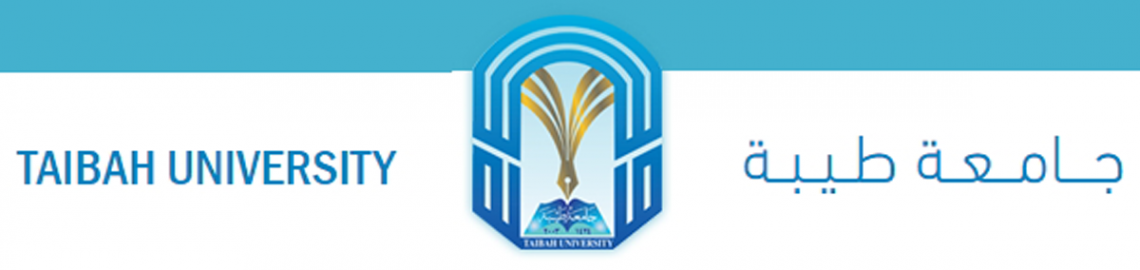





**Securing Smartphones based on Continuous Authentication of Users'Behavioral Biometrics**




**Done By : Maryam Alharbi  / Supervised By :Dr.Rashiq R Marie**

**This Model is an enhance version of HNSA**

RFNSA v 1.4


# Readin Files

In [ ]:
# use info of specific file as self
def use_specific_file_as_self(path_to_file): #function to read dataset for one user
    global rs
    global y_self_test
    y =[] # to save the label of data type
    j = 0 # Counter for loop
    i = 0 # Counter for loop
    data = open(path_to_file,'r') #open the file and read
    list_data = data.readlines()  #read the file line by line
    self = [] #list to store self values
    for j in range(14,len(list_data)): #start from line 14 in datset file of user features
        string = list_data[j].split(',')
        new_self = []
        for i in range(0,9): #read values for eight features
            new_self.append(float(string[i])) #add values to new_listand casting the value to float
        
        y.append(0)
        new_self.append(rs)
        self.append(new_self) #append values to slef list
        
    
    train ,  test = self[:int(0.7*(len(self)))] , self[int(0.7*(len(self))):]
    y_self_test = y[int(0.7*(len(self))):]
    
    return train , test #return list values of user features each line consits of eight values

In [ ]:
import os

#To read all files data as a self

def use_all_the_data_as_self(path_to_folder):
    list_files = os.listdir(path_to_folder)
    
    self = []
    y =[]
    global rs
    global y_self_test
    for id_file in list_files:
        path_to_file = path_to_folder +'//'+id_file
        
        data = open(path_to_file,'r')
        list_data = data.readlines()
        
        for j in range(14,len(list_data)):
            string = list_data[j].split(',')
            if len(string) >= 10:
                new_self = []
                
                for i in range(0,9):
                    new_self.append(float(string[i]))
                
                y.append(0)
                new_self.append(rs)
                self.append(new_self)
    train ,  test = self[:int(0.7*(len(self)))] , self[int(0.7*(len(self))):]
    y_self_test = y[int(0.7*(len(self))):]
    
    return train , test

# Functions

In [ ]:
import random

# to generate random detector here we generate the random values between 0 and 1 instead of generate it and then normlize the data 

def generate_random_detector():
    rnd_det = [] #empty lsit 
    rnd_det.append(random.uniform(0, 1)) #random value for pressure 
    rnd_det.append(random.uniform(0, 1)) #random value for size 
    
    rnd_det.append(random.uniform(0,1)) #random value for touchmajor 
    rnd_det.append(random.uniform(0,1)) #random value for touchminor 
    
    rnd_det.append(random.uniform(0.0,1.0)) #random value for duration 
    rnd_det.append(random.uniform(0.0,1.0)) #random value for flytime 
    rnd_det.append(random.uniform(0.0,1.0)) #random value for shake 
    
    rnd_det.append(random.randint(0,1)) #random value for orientation 
    
    
    
    
    return rnd_det #rnd_def is the list of random values of features

In [ ]:
#Calculate Ecludiane distance
import math
def Ecludiane_dis(par1,par2): 
    dist_ec = 0.0 
    for j in range(8):
        dist_ec += pow(par1[j]-par2[j],2)
    
    return math.sqrt(dist_ec)

# **Intinial Training **



the puropse from this phase is to gnerate detector to cover non self area. The aim from this detectors to detect any non self data in case the data match detectors thats means it is non self data , while the data that not matching is self data. The figure bellow illstrate the concept of self and non self , detectors and shape space 

---
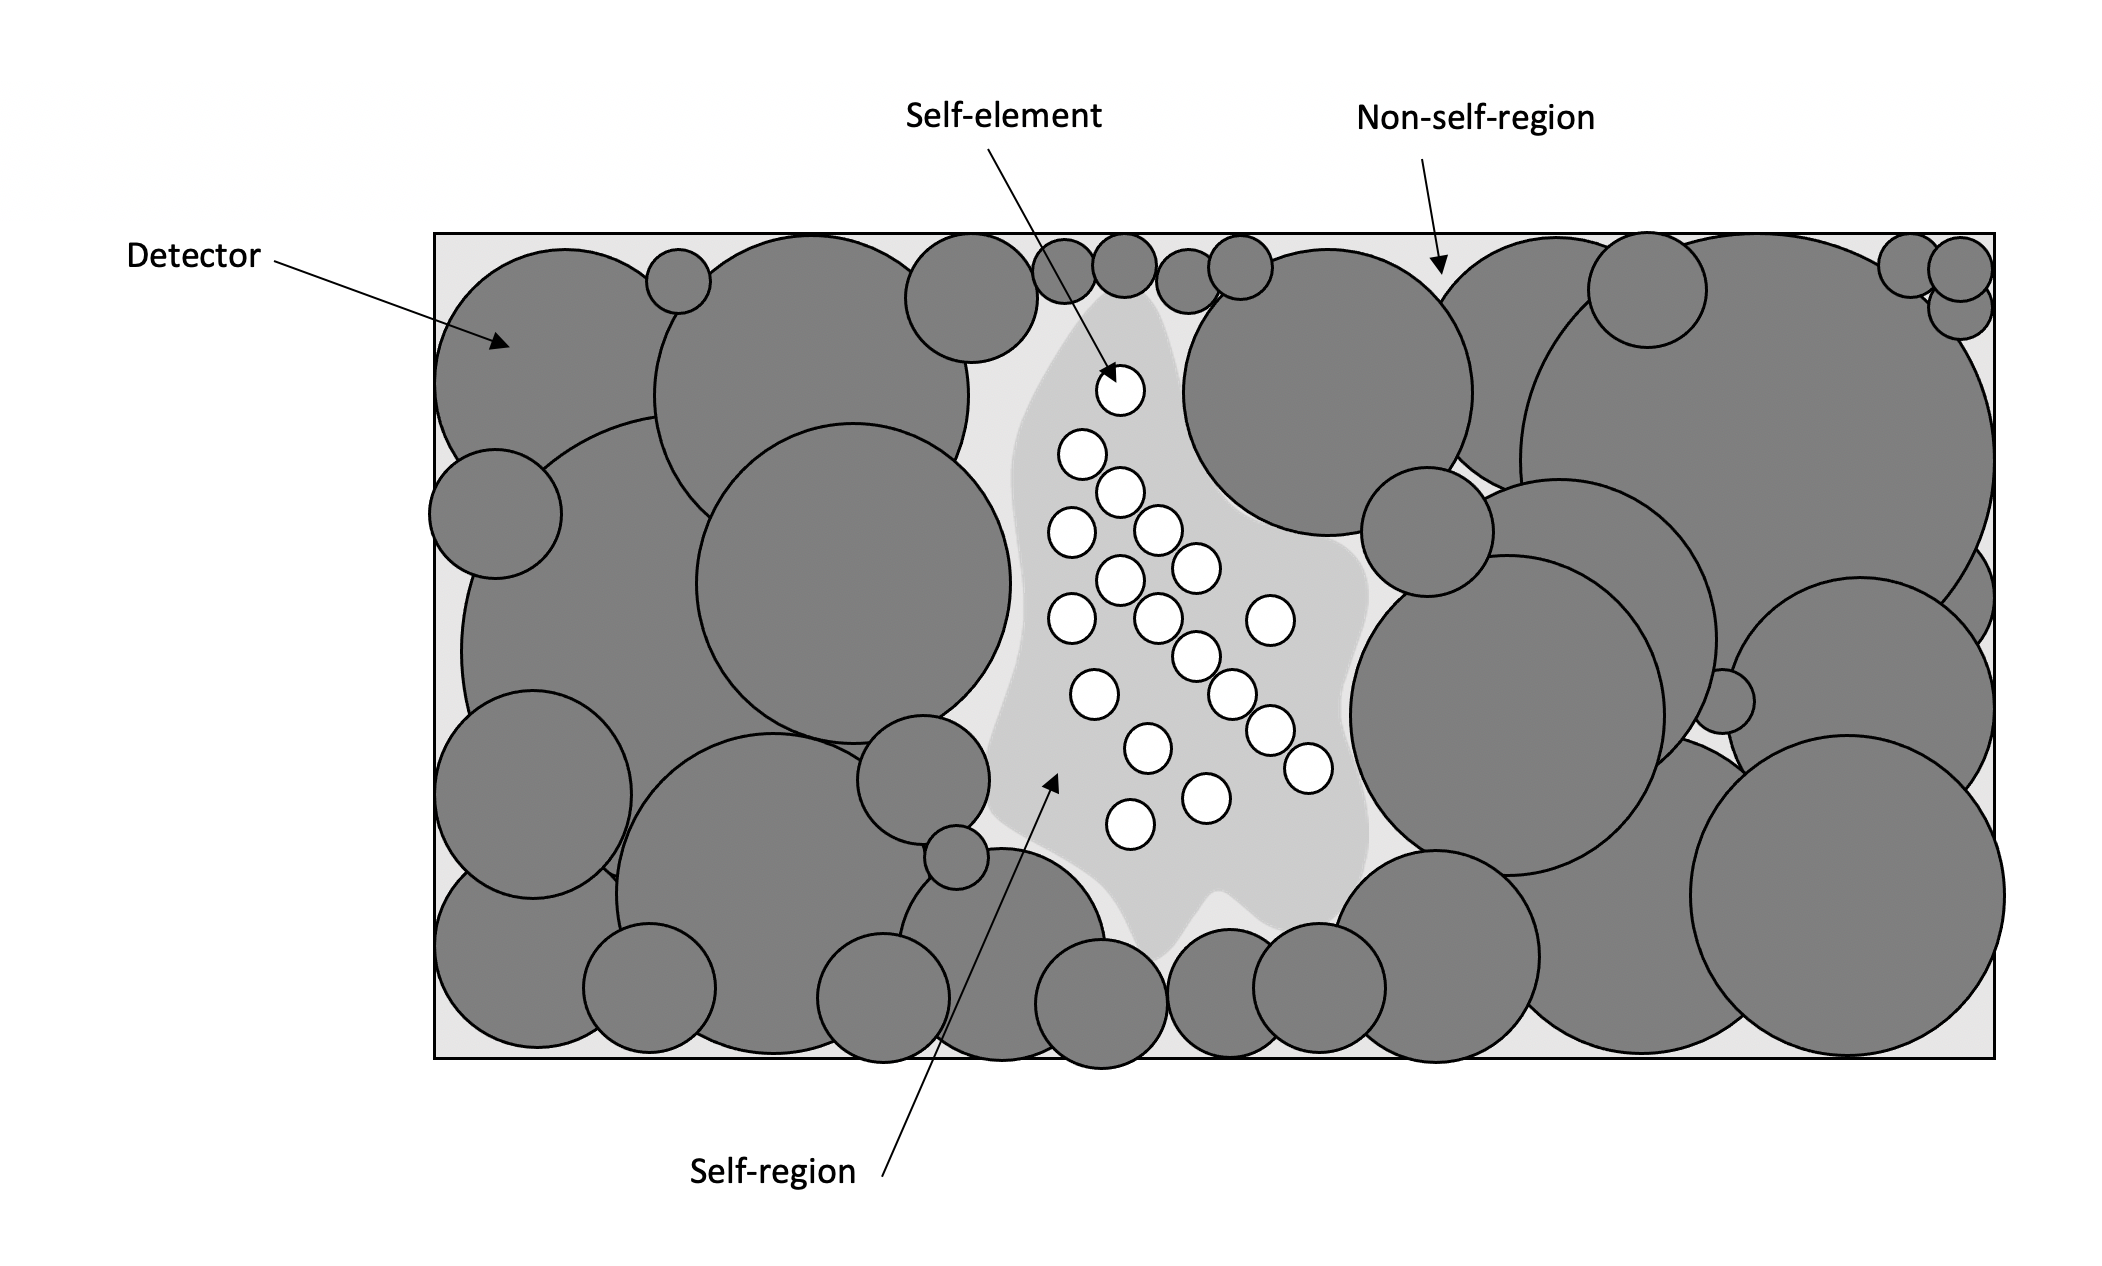


In [ ]:
import sys
def v_detctor(rs,Mmax,Dmax): #Control parameter Radius , estimated coverage area and max number of detectors.
    global init_data 
    self = init_data
    m = 0
    i = 0
    list_detecor_non_self = [] # to save non-self
    list_dis_for_non_self = [] # to save distance rd
    
    
    while(m < Mmax) | (i < Dmax):
        prcd_dist = list([]) # store all the distances
        rnd_detector = generate_random_detector()  #generate random numbers
        min_dist = sys.maxsize #suppose value as min number
        for j in range(len(self)): #here calculate the distances between random detectors and self point 
            self_point = self[j]
            dist = Ecludiane_dis(self_point,rnd_detector)
            prcd_dist.append(dist) 
                
           
        # take the minimuim distance from all distances  
        min_dist = np.min(list(prcd_dist))
        
        if min_dist > rs : #if the minmum distance graeter than radius which means detectors does not match the self point then store the detector with its distance
             
            if i==0:
                
                list_detecor_non_self.append(rnd_detector)
                list_dis_for_non_self.append(min_dist)
                i+=1
            else:
                
                min_dist2 = sys.maxsize
                indice = -1
                #make sure the detectors is not stored previpusly 
                for j in range(len(list_detecor_non_self)):
                    prced_non_self = list_detecor_non_self[j]
                    
                    dis = Ecludiane_dis(prced_non_self,rnd_detector)
                    
                    if dis < min_dist2 :   
                        min_dist2 = dis
                        indice = j
                
                if indice != -1:
                    
                    if min_dist2 < list_dis_for_non_self[indice] : 
                        m+=1
                    else:
                        
                        list_detecor_non_self.append(rnd_detector)
                        list_dis_for_non_self.append(min_dist2)
                        i+=1
                        m = 0
                    
          #return detectors set and its radious          
    return   list_detecor_non_self , list_dis_for_non_self 

**Further Training **

The purpose of this stage is generate the self detector (positive Selection) which means the self detector reconize the selfdata which match those detectors. In further training as you will seen below in function further training all self sample data will be considered  as self detectors.Here we have two two types of self detectors which are:Normal Self Detector(NSD) for positive sample,and Abnormal self detectors (ASD) for negative sample. the figures bellow illustrate the concept of self detectors and two type of detectors 

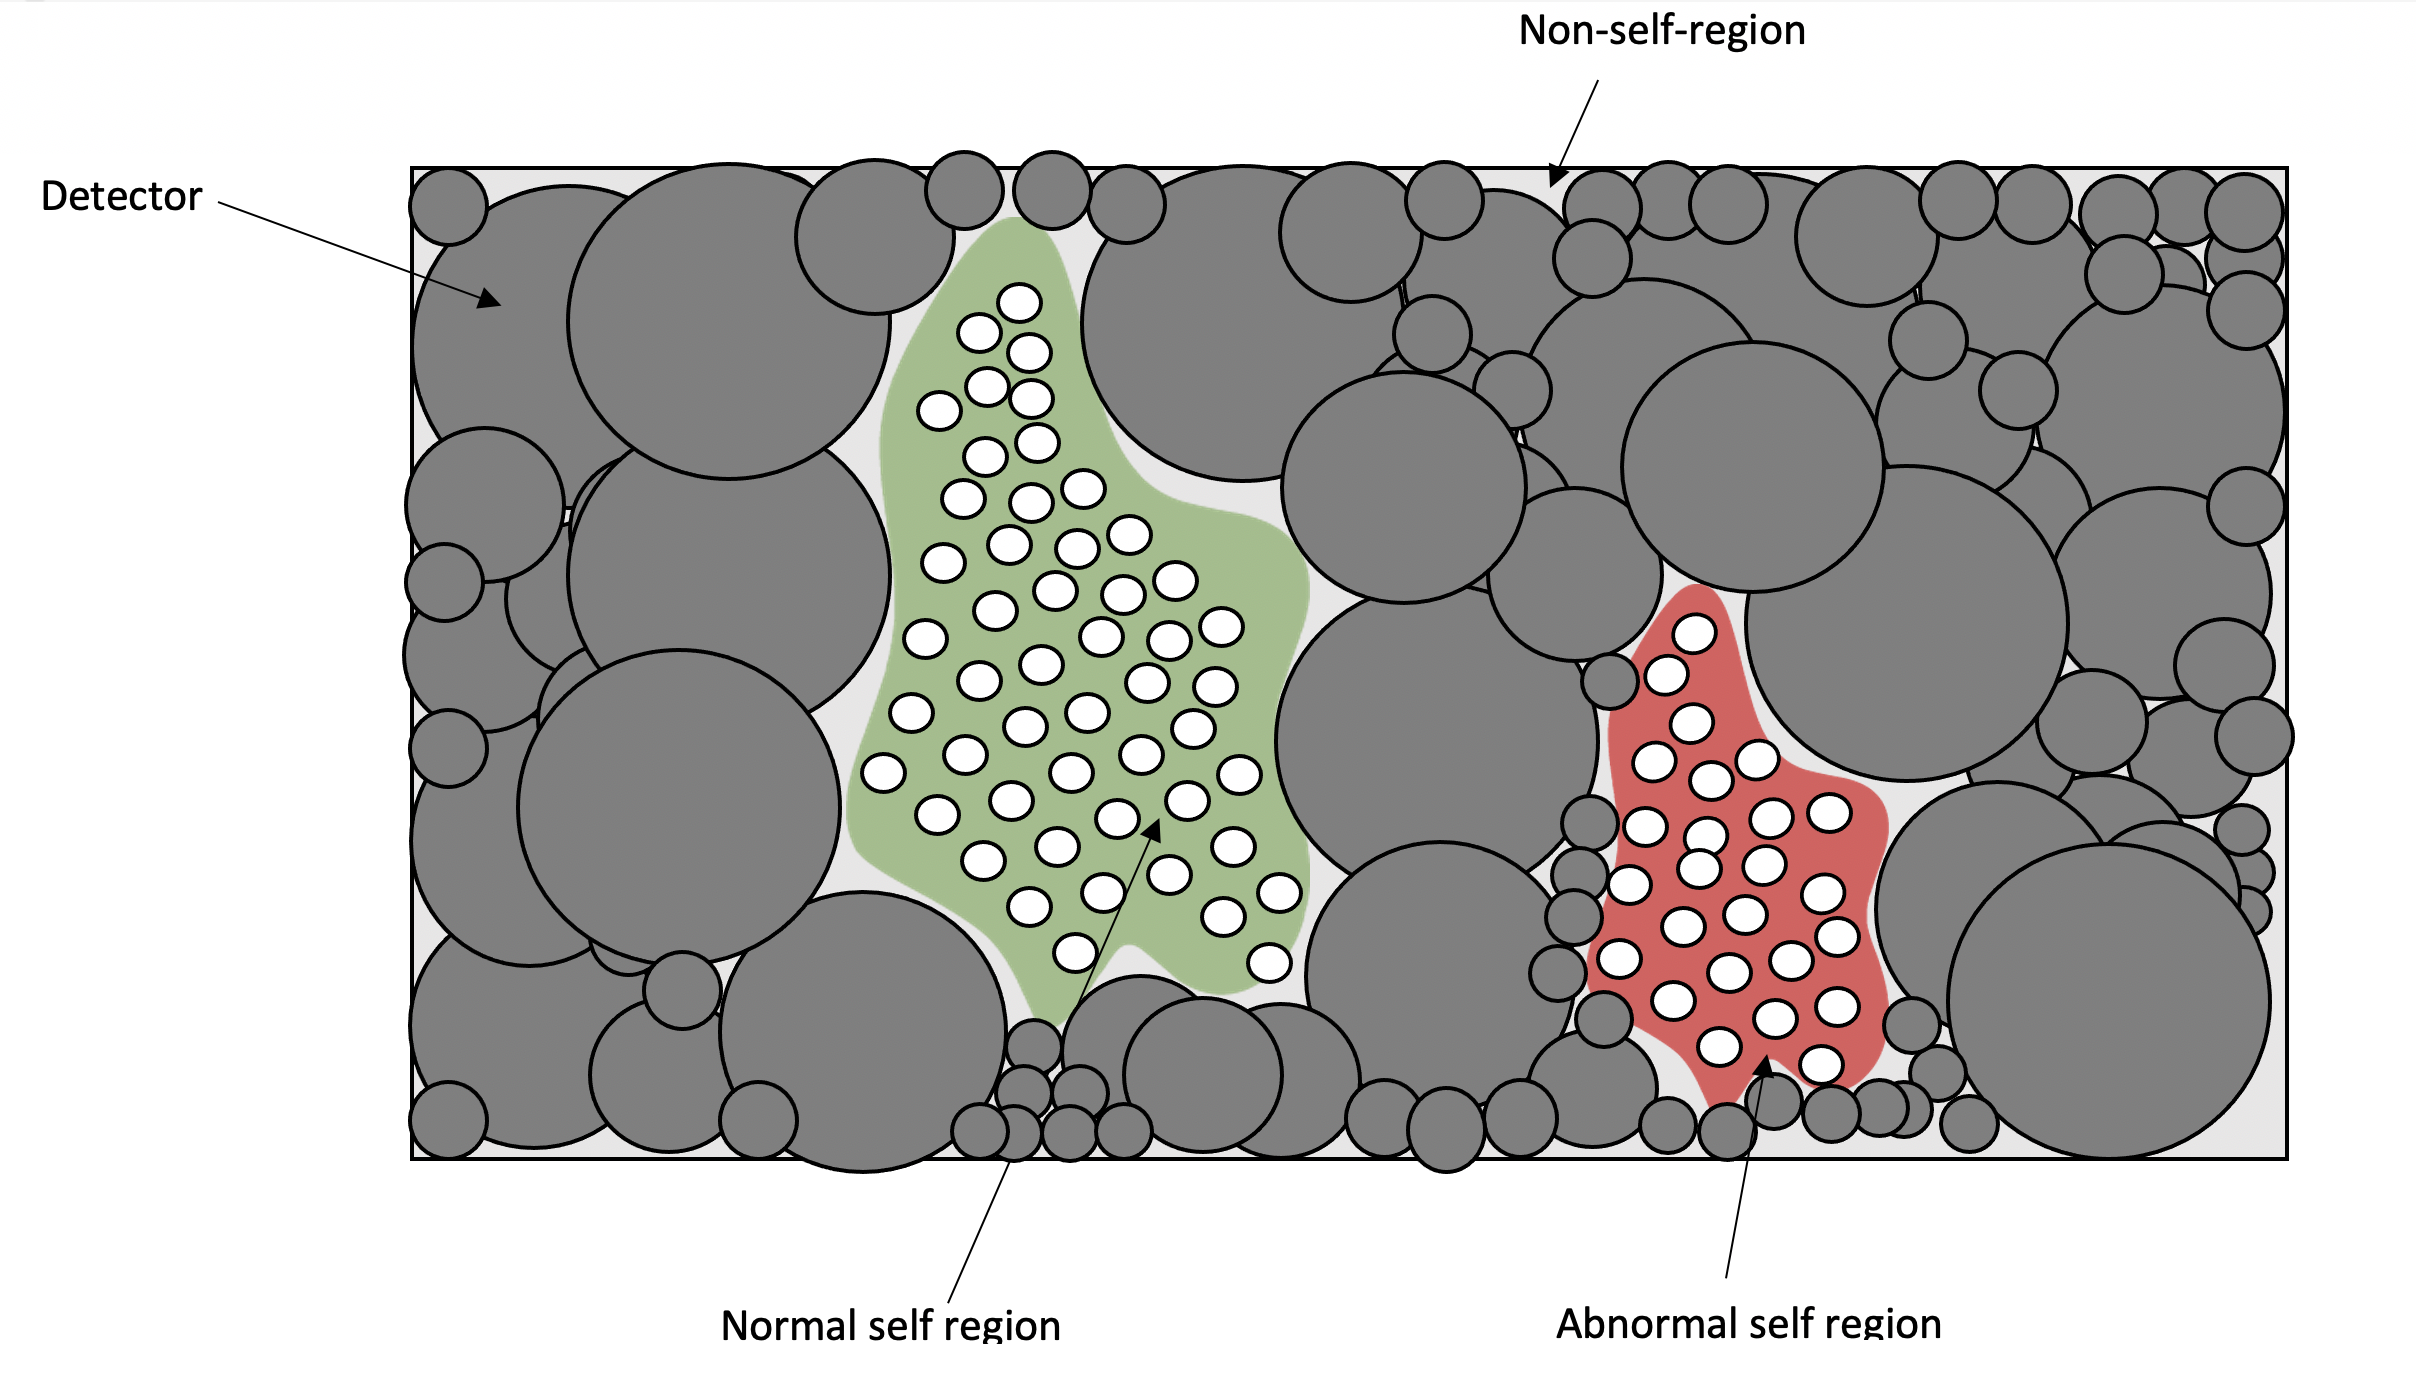

In [ ]:
def further_training(Mmax,Dmax): 
    global unkown_phase1,dis_unkown_phase1 , init_data #the detectors with its distance and training data for self and non self 
    i=0
    m=0

    while(i < Dmax) |(m < Mmax) :
        rnd_detector = generate_random_detector()#generate random number
        b = True #variable to eleminate condition 

        for j in range(len(unkown_phase1)):#non-detectors from phase1
            dst = Ecludiane_dis(unkown_phase1[j],rnd_detector)
            if dst < dis_unkown_phase1[j]:#if the self detctor match any detector 
                b=False #means do nothing,Elimiation 
                m+=1
                break
        if b==True:#Otherwise calculate the ecludian distance between the data and rnd detevtor  
            #nb_itr-=1 #reduce the itration 
            min_dist = Ecludiane_dis(init_data[0],rnd_detector) #suppose the first one is min
            indice = 0

            for j in range(1,len(init_data)):#strat from 1 
                dst = Ecludiane_dis(init_data[j],rnd_detector) #calculate the distance between self point and rnd detctor

                if dst < min_dist : 
                    min_dist = dst 
                    indice = j
            rnd_detector.append(min_dist)  
            rnd_detector.append(init_data[indice][8]) #add label
            if (init_data[indice][8])==1:
              train_non_self.append(rnd_detector)#ASD
            else:
              self.append(rnd_detector)#NSD
        i+=1
        
    print(i)
        
        
            
            
 



**In testing stage the model will classify the new data based on the covering region. The classifying of test data as follow steps:**

1-calculate the distance between test point and self detectors.

2-If it is covered by any Abnormal Detctors then make sure to get more accurate results by make 2 additial condition(IS the RF modle classify it as abnormal? and if the distance between min ditance between self point and self detectors less than or equal to 0.9(this condition to make sure if the value is less but it is soo near. I.e study the relation between those two value it should be less but maybe the diffrent is very small for example if min_dis_asd < rs let suppose if the values are 0.19<0.2) the relation 0.19/0.2=0.95.

3.repeart the same manner for normal detectors

4.if the previous condition not met thats mean it is not covering by any detectors (i.e not belongs to any self region),so it is new behaviour.to decide the classifying of any regions will classify based study this point nearest to any region by condiotion 
(min_dst_asd - r_asd) <= (min_dst_nsd - r_nsd) 
if this condition met thats means it is near to abnormal region


5.if the data not any of above types it will be knew normal.



**Note: **for any new data behaviours detect then intial_data update to add this new behaviour *italicized text*







In [ ]:
def testing(r_asd ,r_nsd):
    global ASD #Abnorml Self Detectors
    global NSD #Normal Self Detectors
    global test_data
    global rd #raduis of detector
    global init_data #dataset for training
    global scl , model
    
    #FIRSTLY :train the Random Forest Model on test data (normal and abnormal)
    pred = model.predict(test_data)
    #Normlizing the data 
    scl.fit(ASD.to_numpy())
    tr_non = scl.transform(ASD.to_numpy())#Normlized data for train nonself
    
    sl = scl.transform(NSD)#Normlized data for train self
    rslt = []  #0 known normal ,1 known abnormal ,2 unknown normal ,3 unknown abnormal
    new_normal=[]
    new_abnormal=[]
    print(len(test_data))
    #NORMLIZING TEST DATA
    scl2 = MinMaxScaler()
    scl2.fit(test_data)
    test_data = scl2.transform(test_data)
    
#Secondly: 
    for j in range(len(test_data)):
        prd = pred[j] #pred from RF Model
        t = test_data[j] #test data 
        continue_serach = True # mean we found the best preduction or continue
        min_dst_asd = Ecludiane_dis(t,tr_non[0])#suppose the first dist is min
        
        reshaped_t = np.array(t).reshape(-1, 1)
        
        for j in range(1,len(train_non_self)):#claculate the dis between test sample and train_non self  
            dst = Ecludiane_dis(t,tr_non[j])
            if dst < min_dst_asd : 
                min_dst_asd = dst
  
            
        
        if min_dst_asd < r_asd :#abnormal  
            
            if prd == 1 and (min_dst_asd/r_asd) <= 0.9: #add the second condition to setudy the relation between two values if it is very near or not 
                
                rslt.append(1)
                continue_serach = False
                
            
        if continue_serach == True :
            min_dst_nsd = Ecludiane_dis(t,sl[0])
            for j in range(1,len(sl)):
                dst = Ecludiane_dis(t,sl[j])
                if dst < min_dst_asd : 
                    min_dst_nsd = dst
                    
           
            if min_dst_nsd < r_nsd :
                if prd == 0 and (min_dst_nsd/r_nsd)<=0.9 :#
                    rslt.append(0)
                    continue_serach = False
                
                
                
        if continue_serach == True :
            if (min_dst_asd - r_asd) <= (min_dst_nsd - r_nsd):
                if (min_dst_asd - r_asd) >= rd :
                    f = list(t)
                    f[9] = rd
                    f[8] = 1 #add it to self as abnormal

                    init_data = np.append(init_data,   [f], axis=0) #add tos self as abnormal (will be in the future a self abnormal )

                else :
                    f = list(t)
                    f[9] = min([min_dst_asd, r_asd])
                    f[8] = 1 #add it to self as abnormal
                    init_data = np.append(init_data,   [f], axis=0)
                    
                if prd == 1 :    
                    rslt.append(1)#update 
                    new_abnormal.append(f)
                    continue_serach = False

                
                
        if continue_serach == True :
            if (min_dst_nsd - r_nsd) >= rd :
                f = list(t)
                f[9] = rd
                f[8] = 0 #add it to self as abnormal
                #new_abnormal.append(f)

                init_data = np.append(init_data,   [f], axis=0) #add tos self as abnormal (will be in the future a self abnormal )

            else :
                f = list(t)
                f[9] = min([min_dst_asd, r_asd])
                f[8] = 0 #add it to self as abnormal
                init_data = np.append(init_data,   [f], axis=0)
            rslt.append(0)
            new_normal.append(f)
            del f
                    
                    
                        
    return rslt ,new_normal,new_abnormal              
                
    

# Dealing With Data

In [ ]:
#define the raduis of the self
rs = 0.2
#define the raduis of the detector
rd = 0.4
#we. note the algorithm have stable performace when the relation between rd and rs as rd=2*rs
y_self_test = [] 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/lastv/data"
self , test_self = use_all_the_data_as_self(path)#train_self
#self , test_self =use_specific_file_as_self(path)

In [ ]:
import numpy as np
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/lastv/Abnormal_data.csv')

#fill the column type with ones which means Known Abnormal
data['type']=np.ones(data.shape[0])
data['raduis'] = np.full(
    shape=data.shape[0],
    fill_value=rs,
    dtype=np.float)
data.head()

,pressure,attribute size,attribute touchmajor,attribute touchminor,attribute duration,attribute flytime,attribute shake numeric,attribute orientation numeric,type,raduis
0,0.234151,0.083914,3.306926,7.180807,89.485343,145.817608,480.665881,1,1.0,0.2
1,0.095338,0.221594,6.804092,8.851749,776.701519,996.310074,118.472484,1,1.0,0.2
2,0.483111,0.993733,7.168946,9.611857,486.086071,628.686554,562.938204,1,1.0,0.2
3,0.939945,0.798911,8.235694,9.486298,323.739289,114.529631,627.790894,1,1.0,0.2
4,0.822318,0.102740,7.938670,7.966129,419.810470,219.110712,986.874810,1,1.0,0.2


In [ ]:
data.columns.values

array(['pressure', 'attribute size', 'attribute touchmajor',
       'attribute touchminor', 'attribute duration', 'attribute flytime',
       'attribute shake numeric', 'attribute orientation numeric', 'type',
       'raduis'], dtype=object)

In [ ]:
y_non_self = np.ones(data.shape[0])

In [ ]:
from sklearn.model_selection import train_test_split 

train_non_self , test_non_self ,y_train_non_self , y_test_non_self = train_test_split(data,y_non_self, test_size=0.3, random_state=42)

In [ ]:
import numpy as np
init_data = np.concatenate(( train_non_self.to_numpy() , np.array(self)),axis=0)#Train_data

In [ ]:
dataframe_train_data = pd.DataFrame(data = init_data)
dataframe_train_data.columns = ['pressure', 'attribute size', 'attribute touchmajor',
       'attribute touchminor', 'attribute duration', 'attribute flytime',
       'attribute shake numeric', 'attribute orientation numeric', 'type',
       'raduis']
dataframe_train_data

,pressure,attribute size,attribute touchmajor,attribute touchminor,attribute duration,attribute flytime,attribute shake numeric,attribute orientation numeric,type,raduis
0,0.738576,0.433604,9.063023,3.287221,300.839151,145.551763,907.933743,1.0,1.0,0.2
1,0.490881,0.493693,4.220438,9.336123,635.885216,484.295726,588.150531,1.0,1.0,0.2
2,0.810864,0.493129,6.970505,9.831867,188.571813,464.858165,963.755181,1.0,1.0,0.2
3,0.474932,0.355566,2.632510,2.806116,979.996771,638.506433,245.999725,1.0,1.0,0.2
4,0.100484,0.184131,2.324290,6.395209,436.655759,653.183649,410.864218,1.0,1.0,0.2
...,...,...,...,...,...,...,...,...,...,...
96171,0.093137,0.084314,14.322973,14.322973,76.000000,388.000000,47.409890,1.0,1.0,0.2
96172,0.118954,0.045752,7.772156,7.772156,64.000000,0.000000,28.167099,1.0,1.0,0.2
96173,0.103268,0.047059,7.994217,7.994217,67.000000,579.000000,52.578495,1.0,1.0,0.2
96174,0.084314,0.036275,6.162210,6.162210,98.000000,1262.000000,30.075933,1.0,1.0,0.2


In [ ]:
y_train = list(y_train_non_self) + list(np.zeros(np.array(self).shape[0]))

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier() #intilize random forest classifier
model.fit(dataframe_train_data,y_train) #train Random foresr classifeir 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
test = list(test_non_self.to_numpy()) + list(test_self)
y_test = list(y_test_non_self) + list(y_self_test)

In [ ]:
from sklearn.metrics import accuracy_score as acc
acc(model.predict(test) , y_test)

0.9998544360610399

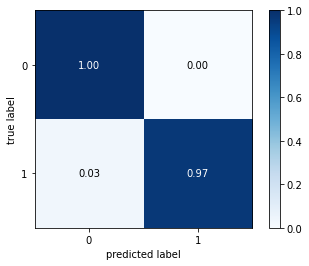

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
prd = model.predict(test)
cf = confusion_matrix(y_test,prd)
from mlxtend.plotting import plot_confusion_matrix

multiclass = confusion_matrix(y_test,prd)


fig, ax = plot_confusion_matrix(conf_mat=multiclass, colorbar=True,
show_absolute=False, show_normed=True)
ax.margins(2,2) #just change the values til adjust to your screen.
plt.show()

In [ ]:
from sklearn.model_selection import validation_curve
param_range = np.arange(1, 25, 2)
train_scores, valid_scores = validation_curve(RandomForestClassifier(), dataframe_train_data, y_train,param_name="n_estimators",param_range=param_range,
    scoring="accuracy", n_jobs=1)

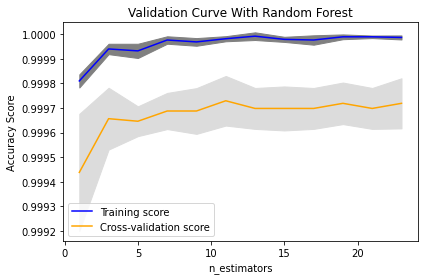

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="blue")
plt.plot(param_range, test_mean, label="Cross-validation score", color="orange")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

# V-Detector

In [ ]:
init_data.shape

(96175, 10)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()
scl.fit(init_data)
init_data = scl.transform(init_data)

In [ ]:
init_data

array([[0.81047859, 0.49312546, 0.02558486, ..., 1.        , 0.        ,
        0.        ],
       [0.2687882 , 0.42843829, 0.02467075, ..., 0.66666667, 0.        ,
        0.        ],
       [0.09864948, 0.18344569, 0.008521  , ..., 0.11111111, 0.        ,
        0.        ],
       ...,
       [0.10143957, 0.04607101, 0.02934459, ..., 0.        , 0.        ,
        0.        ],
       [0.08244668, 0.03526289, 0.02261628, ..., 0.        , 0.        ,
        0.        ],
       [0.10125245, 0.07582843, 0.04786926, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
unkown_phase1,dis_unkown_phase1 = v_detctor(rs,10,16) # here apply the algorithm with full coverage estimated area

In [ ]:
len(unkown_phase1)

17

In [ ]:
#import numpy as np

# rd_value= round(np.average(dis_unkown_phase1), 2)

#print(rd_value)

In [ ]:
#rd=rd_value

In [ ]:
len(init_data)

96176

# Further Trainig

In [ ]:
further_training(10,16)

16


# Testing Phase

In [ ]:
test_data = np.concatenate(( test_non_self.to_numpy() , np.array(test_self)),axis=0)

In [ ]:
len(test_non_self)

183

In [ ]:
len(test_self)

41036

In [ ]:
test_data = np.concatenate(( test_non_self.to_numpy() , np.array(test_self)),axis=0)
#scl2 = MinMaxScaler()
#scl2.fit(test_data)
#test_data = scl2.transform(test_data)

y_test = list(y_test_non_self) + list(y_self_test)
#Testing the model on all the test data it will take huge time
#test_data = test_data[:700]
#y_test = y_test[:700]

In [ ]:
ASD=train_non_self
NSD=self

In [ ]:
prd,new_normal,new_abnormal = testing(rs,rs)

41219


In [ ]:
len(new_normal)

38255

In [ ]:
len(new_abnormal)

169

# Model performance

# Model performance

In [ ]:
from sklearn.metrics import accuracy_score as acc

In [ ]:
acc(y_test,prd)

0.9996603508090929

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prd))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     41036
         1.0       1.00      0.92      0.96       183

    accuracy                           1.00     41219
   macro avg       1.00      0.96      0.98     41219
weighted avg       1.00      1.00      1.00     41219



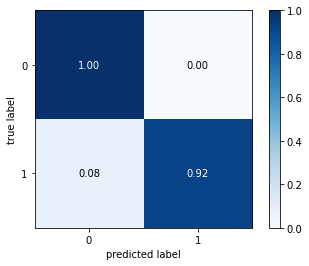

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
cf = confusion_matrix(y_test,prd)
from mlxtend.plotting import plot_confusion_matrix

multiclass = confusion_matrix(y_test,prd)


fig, ax = plot_confusion_matrix(conf_mat=multiclass, colorbar=True,
show_absolute=False, show_normed=True)
ax.margins(2,2) #just change the values til adjust to your screen.
plt.show()

In [ ]:
CM = confusion_matrix(y_test, prd)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

In [ ]:
TP/(TP+FN) #Detection Rate

0.9234972677595629

In [ ]:
FP/(FP+TN) #False Alarm Rate

0.0

In [ ]:
# here we use balanced_accuracy_score based on recondation of thaka center from monshaat org becouse the data class unblanced.
from sklearn.metrics import balanced_accuracy_score 
balanced_accuracy_score(y_test,prd)

0.9617486338797814